In [279]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Cars4U Breaking Into the Used Car Sector - Intro and problem statement

For this second project, our end objective is to predict the price of a used car in order to make the highest amount of profit that we can. This case is specifically directed towards the used car market in India, however, we can easily extrapolate the methodologies used here to other world markets. 

Used car sales have increased during the past years, and in fact, have surpassed the amount of new cars sold in India for the year 2018-2019. This means second-hand brokers have gained importance in the car market. Unlike new cars, however, it is more difficult to set a tag price on a car since it is not defined by the manufacturer. For this reason, it has become very important to find methods which allow a reseller to obtain the highest profit from their sales. One way we can accomplish this is with Linear Regression, which we will implement at the end of this project to predict the value of column 'Price'.

Unfortunately, before we can even start thinking about model selection and implementation, we most first have a proper dataset which we can feed into our model for training. As is the case in real life, most data does not come neatly packaged and ready to use, it must first undergo preprocessing and imputation techniques to make it useful. 

We will first perform EDA/Preprocessing since they go hand to hand, and then procceed to implement linear regression in order to predict Price of used car. As we will see shortly, some columns data types must be changed to categories and then one-hot encoded, other columns which should be numerical have to be processed and cleaned first. We then decide how to impute our missing values, in some cases we can safely remove the observations (if there are few rows with missing values), but in other cases we must become more creative and use other techniques. 

Once all of this is done, we can implement our model and test its results with different metrics such as r-squared (or adjusted r-squared), MAE, MSE and RMSE.


# EDA - Data Preprocessing (As they go hand to hand)
In this first part of the project, we will perform some exploratory data analysis and plot univariate and bivariate plots to help us visualize data behavior in a graphical manner. We make use of common methods such as tools such as shape, describe, isnull, sns.hist, sns.parplot and a few more.

In [280]:
# Load data set, no need to change spaces to underscores since it has already been done for us. However, it is good
# practice to do so in order to use df.column_name type of methods
df=pd.read_csv('used_cars_data.csv')

In [281]:
# Random sample with seed set to 10 for results reproduction
np.random.seed(10)
df.sample(n=20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3779,3779,Toyota Etios Liva G,Kochi,2015,52207,Petrol,Manual,First,17.71 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.56
4303,4303,Volkswagen Vento Diesel Comfortline,Kochi,2013,47910,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,4.89
1875,1875,Toyota Innova 2.5 LE 2014 Diesel 7 Seater,Pune,2014,102418,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,7.0,NaN,10.10
3828,3828,Maruti Wagon R LXI,Kochi,2015,50230,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,3.87
4455,4455,Fiat Avventura MULTIJET Emotion,Hyderabad,2015,57266,Diesel,Manual,First,20.5 kmpl,1248 CC,91.72 bhp,5.0,NaN,6.50
3011,3011,Tata Indigo eCS eLS BS IV,Kolkata,2016,78000,Diesel,Manual,First,25.0 kmpl,1396 CC,69.01 bhp,5.0,NaN,2.30
5813,5813,Renault Duster 85PS Diesel RxL,Hyderabad,2013,74911,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,NaN,6.00
4115,4115,Maruti SX4 ZXI MT BSIV,Kochi,2011,79940,Petrol,Manual,First,15.5 kmpl,1586 CC,103.3 bhp,5.0,NaN,2.78
5093,5093,Hyundai Verna 1.6 CRDi S,Chennai,2015,85000,Diesel,Manual,First,23.9 kmpl,1582 CC,126.2 bhp,5.0,NaN,6.30
204,204,Tata Indigo eCS GLX,Pune,2010,70500,Petrol,Manual,First,15.64 kmpl,1193 CC,64.1 bhp,5.0,NaN,1.50


From this quick sample we can note various things. Firstly S.No is the same as our pandas index, so we can safely drop that column. Secondly, we can see some values missing in New_Price and some of the numerical columns have become object columns because they conatin words such as 'bhp', 'kmpl' and 'CC'. We will have to convert these values into floats before performing any model training. We can also see that Name starts with car's brand so we may be able to create a new column which contains the brand instead of the name and achieve better results with our model.

In [282]:
df.drop('S.No.', axis = 1, inplace =True)
print('Types of variables in dataframe:')
print(df.info())
print('\nShape of dataframe:')
print(df.shape)
print('\n5 Point analysis of numerical variables in dataframe:')
print(df.describe())
print('\nNumber of null values in dataframe:')
print(df.isnull().sum())

Types of variables in dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB
None

Shape of dataframe:
(7253, 13)

5 Point analysis of numerical variable

# Processing Columns
As we suspected, 'Mileage', 'Engine', 'Power' and 'New Price' have to be pre-processed before attempting any type of graphical representation. Moreover, 'New Price' and 'Price' also need to be converted into proper units, which means multiplying them by a factor of 100 if they conatin the word 'Cr". We will perform all of these changes first, and then perform univariate and bivariate plots of our varibales to better understand them. 
Steps:
- Convert object varibales to category where needed
- Remove 'Lakh' from 'New_Price', multiply times 
- Multiply 'Price' by 100 if it ends in Cr
- Remove 'kmpl' from 'Mileage', convert to float
- Remove 'CC' from 'Engine', convert to float
- Remove 'bhp' from 'Power', convert to float
- Create new column 'Brand' by splitting Name

In [283]:
# In this exercise we don't have too many columns, however, it is always useful to automate when we can.
# Name can be left as object, but we should change Location, Fuel_Type, Transmission and Owner_Type to categorical values.
df.columns[df.dtypes == 'object']

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [284]:
# Convert object varibales to category where needed
for i in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']:
    df[i]= df[i].astype('category')

In [285]:
# Remove 'Lakh' from 'New_Price', multiply times 
# Multiply 'Price' by 100 if it ends in Cr
def to_Lakh(value):
    """ This function will help us turn New_Price into a single unit. We see some entries as Lakh and some other as Cr
    which is equal to 100 lakh. We will remove Lakh from entry, and remove Cr from entry but also multiply times 100
    so all of our prices are in the same metric"""
    if isinstance(value, str): # Check if input is string (as we want to treat nan's differently)  
        if value.endswith('h'): # For cases where price is already in desired unit
            m = 1
        elif value.endswith('r'): # For cases where price is in Cr
            m = 100
        return float(value.replace('Lakh', '').replace('Cr', '')) * m
    else:  # this happens when the current income is np.nan
        return np.nan
    
df['New_Price'] = df['New_Price'].apply(to_Lakh)

In [286]:
# Remove 'kmpl' from 'Mileage', convert to float
# Remove 'CC' from 'Engine', convert to float
# Remove 'bhp' from 'Power', convert to float

def strip_Letters(value):
    """ This function will strip letters from its input and return a float. Note that in Mileage, some entries have kmpl and
    others km/kg, however, a quick google search shows us that km/kg is actually kmpl so we can safely convert both types
    with this same function. We also account for casses in Power where entry satates null bhp"""
    if isinstance(value, str): # Check if input is string like we did before
        if value.split()[0] == 'null': # Some entries state null bhp so we must account for this or we will get an error
            return np.nan
        else:
            return float(value.split()[0])
    else:  # this happens when the current income is np.nan
        return np.nan

for i in ['Mileage', 'Engine', 'Power']:
    df[i] = df[i].apply(strip_Letters)

In [287]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


# Feature Engineering

In [288]:
# Create new column 'Brand' by splitting Name

def get_Brand(value):
    return(value.split()[0])
    
df['Brand'] = df['Name'].apply(get_Brand).astype('category')
df['Brand'] = df['Brand'].astype(str).replace('Land', 'Land Rover').astype('category') # We do this since the Brand is 
# Land Rover and not Land
df['Brand'] = df['Brand'].astype(str).replace('ISUZU', 'Isuzu').astype('category') # Since Isuzu and ISUZU are the same
# brand, we should replace the one with Caps Lock to proper name

In [289]:
df.sample(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
1112,Hyundai EON Era,Jaipur,2014,18000,Petrol,Manual,First,21.10,814.0,55.20,5.0,NaN,2.50,Hyundai
3950,Toyota Corolla Altis VL,Delhi,2010,60000,Petrol,Automatic,Second,14.53,1798.0,138.10,5.0,NaN,4.65,Toyota
5217,Tata New Safari DICOR 2.2 VX 4x4,Chennai,2009,120000,Diesel,Manual,Second,13.93,2179.0,138.00,7.0,NaN,3.00,Tata
4888,Honda Amaze S i-Dtech,Kochi,2016,47471,Diesel,Manual,First,25.80,1498.0,98.60,5.0,NaN,5.25,Honda
507,Honda Mobilio S i VTEC,Mumbai,2015,25000,Petrol,Manual,Second,17.30,1497.0,117.30,7.0,NaN,4.25,Honda
1572,Hyundai Verna 1.6 CRDI,Kolkata,2014,32000,Diesel,Manual,First,22.32,1582.0,126.30,5.0,NaN,4.30,Hyundai
6236,Hyundai i10 Magna,Kolkata,2015,46000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,NaN,Hyundai
3360,Hyundai i20 Magna Optional 1.4 CRDi,Chennai,2012,70000,Diesel,Manual,First,21.90,1396.0,88.80,5.0,NaN,4.00,Hyundai
2220,Honda Brio 1.2 VX AT,Mumbai,2017,20000,Petrol,Automatic,First,16.50,1198.0,86.80,5.0,8.05,5.99,Honda
1863,BMW 5 Series 2013-2017 520d Luxury Line,Jaipur,2017,19543,Diesel,Automatic,First,18.12,1995.0,190.00,5.0,NaN,40.50,BMW


The new feature will help us later on to impute values based on group instead of only considering the totality of the dataset, which would make our results biased. There are a number of cars with very expensive prices and a lot of horsepower, which would skew the mean.

# Data Visualization, In-Depth EDA

Now that columns such as 'Engine', 'Power' and 'Mileage' have bceome numerical, we can use histograms to look at the distribution and decide how to impute our missing values.

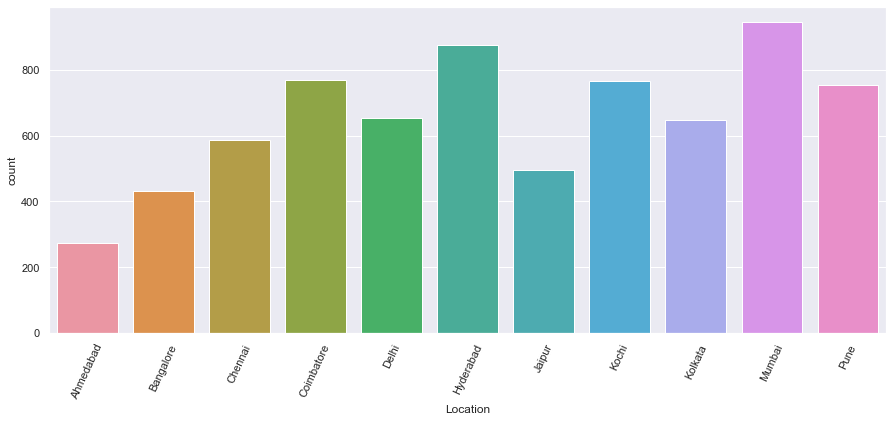

<Figure size 432x288 with 0 Axes>

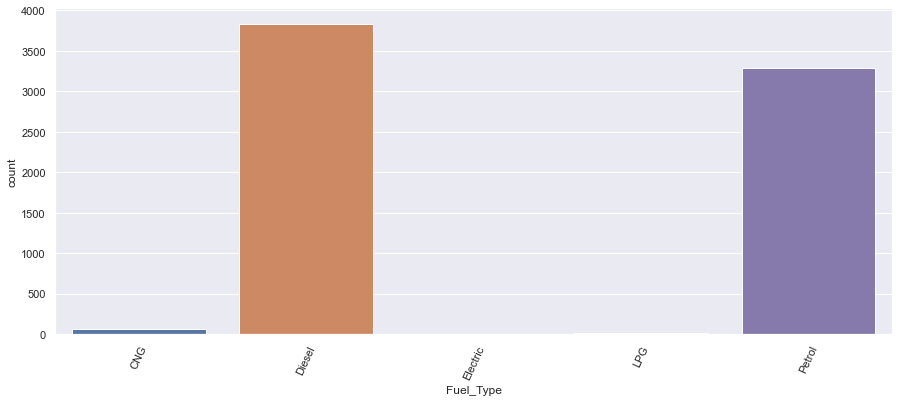

<Figure size 432x288 with 0 Axes>

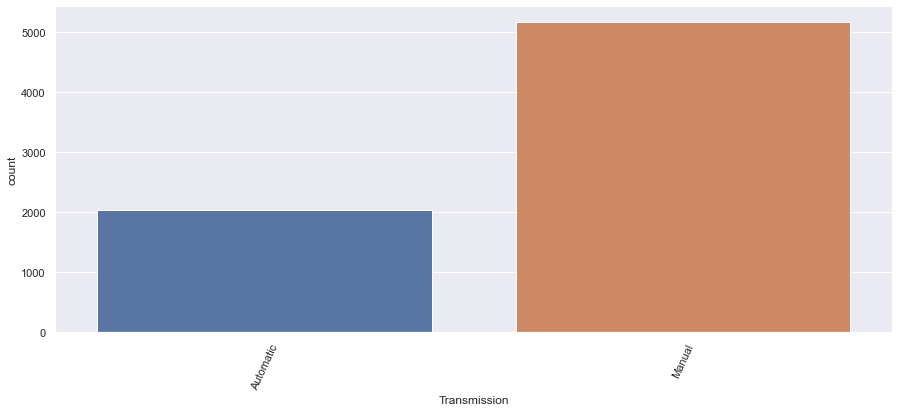

<Figure size 432x288 with 0 Axes>

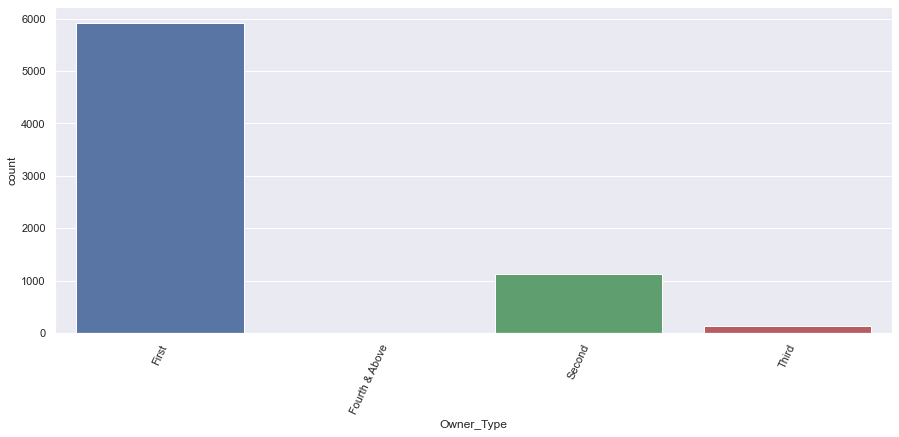

<Figure size 432x288 with 0 Axes>

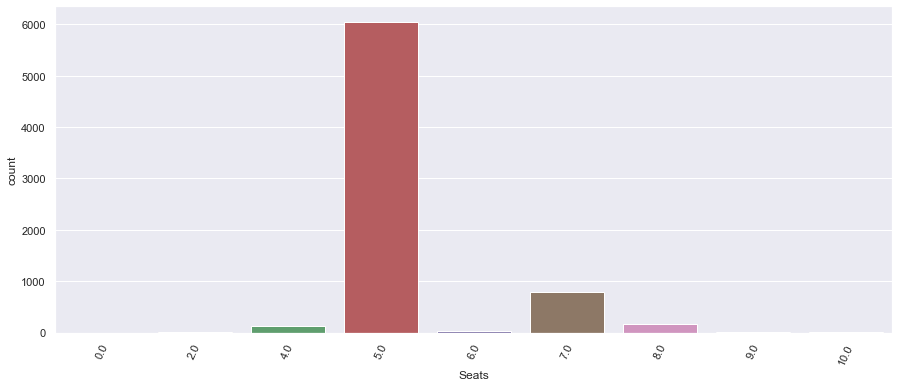

<Figure size 432x288 with 0 Axes>

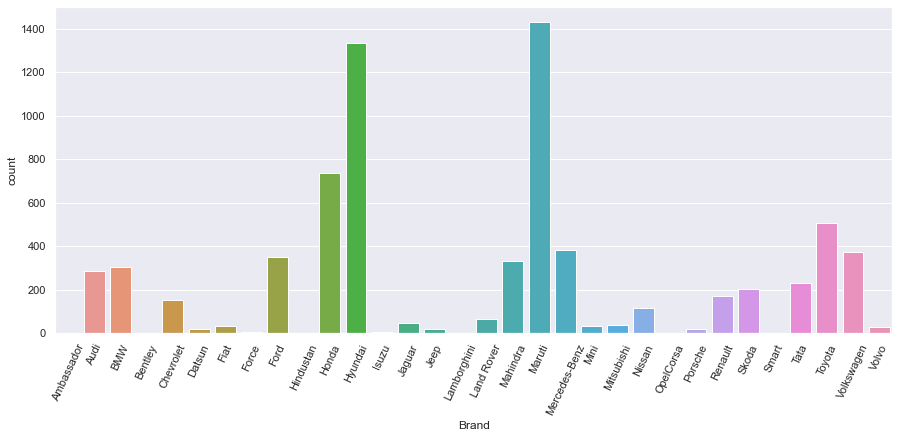

<Figure size 432x288 with 0 Axes>

In [290]:
# We can plot some countplots for our categorical values to get an idea of the number of categories in each of the variables
sns.set(color_codes = True)

df = df[df['Seats'].notna()]
df['Seats'] = df['Seats'].astype('category')



for i in df.columns[df.dtypes == 'category']:
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=65);
    sns.countplot(df[i])
    plt.figure()


From this quick graphics we can state most used cars are being sold in Mumbai, most cars have Diesel Engines and have manual transmissions. Most have only had a single owner and are sedans (5 seats). Hyundai and Maruti have gained most of the market.

In [291]:
# For a numerical insight, we can use value_counts

for i in df.columns[df.dtypes == 'category']:
    print('\n',i)
    print(df[i].value_counts())


 Location
Mumbai        944
Hyderabad     875
Coimbatore    770
Kochi         767
Pune          755
Delhi         655
Kolkata       647
Chennai       587
Jaipur        495
Bangalore     431
Ahmedabad     274
Name: Location, dtype: int64

 Fuel_Type
Diesel      3838
Petrol      3286
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

 Transmission
Manual       5163
Automatic    2037
Name: Transmission, dtype: int64

 Owner_Type
First             5923
Second            1132
Third              134
Fourth & Above      11
Name: Owner_Type, dtype: int64

 Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

 Brand
Maruti           1428
Hyundai          1332
Honda             735
Toyota            504
Mercedes-Benz     380
Volkswagen        374
Ford              349
Mahindra          330
BMW               305
Audi              285
Tata              228
Skoda         

We can see a similar number of gas cars and Diesel cars, while very few of the other types. The majority of car brands are Hyundai and Maruti, which are known to hold a large percentage of the Indian car market. There are also a couple of exotic cars such as Lamborghini and Bentley. Most cars have a manual transmission and most are sedans, judging from the fact that the large majority have 5 seats. Mumbai's used car market is the largest compared to other cities, but not by a large amount.

# Imputation

In [292]:
# Let's take a look at the rows where 'Engine' is NaN
df[df['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand


In [293]:
# Let's take a look at the rows where 'Power' is NaN
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00,Ford
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.30,Hyundai
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10,Hyundai
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85,Hyundai
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67,Hyundai
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,NaN,4.10,Maruti
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,0.95,Hyundai
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.75,Hyundai
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.00,1086.0,NaN,5.0,NaN,1.50,Hyundai
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.80,1248.0,NaN,5.0,NaN,2.50,Maruti


In [294]:
# Missing value imputation
# We only have two missing values for Mileage, so we can safley drop those 2 observations. We can do the same with 'Engine',
# and 'Seats' (previously dropped) column since there are only 7 left after dropping 'Engine' which had 46 missing values
for i in ['Mileage', 'Engine']:
    df = df[df[i].notna()]


In [295]:
# We can see each brand has rather different average Engine size, so instead of imputting 'Power' with the mean power of 
# all cars in our dataset, we will fill with mean values by 'Brand' instead! We will drop Smart and Hindustan first since
# there is only one example of each
for i in ['Hindustan', 'Smart']:
    df.drop(df.loc[df['Brand'] == (i)].index, inplace=True)
print(df.groupby('Brand')['Power'].mean().sort_values())
print('\n',df['Brand'].value_counts())

# This line of code allows us to do just that, impute values with group mean, very powerful tool
df['Power'] = df['Power'].fillna(df.groupby('Brand')['Power'].transform('mean'))
#Done!

Brand
Ambassador        35.500000
Datsun            60.644706
Maruti            74.000007
Tata              78.281652
Renault           87.510471
OpelCorsa         88.000000
Fiat              89.028125
Nissan            89.702478
Chevrolet         90.909333
Hyundai           92.152134
Volkswagen        94.761220
Ford              96.356784
Honda            108.489128
Mahindra         119.709509
Skoda            126.622750
Toyota           128.330561
Force            139.030000
Mitsubishi       145.193333
Mini             146.656774
Isuzu            147.514000
Jeep             168.947368
Volvo            188.464286
Land Rover       188.745938
Audi             189.340246
Mercedes-Benz    193.620820
BMW              210.728820
Jaguar           236.216458
Porsche          325.917647
Lamborghini      560.000000
Bentley          584.000000
Hindustan               NaN
Smart                   NaN
Name: Power, dtype: float64

 Maruti           1428
Hyundai          1332
Honda             735
To

In [296]:
# There are almost 1250 values missing from New_Price so we shouldn't just drop all those observations. Instead, let's take
# a look at the histogram and then the log since price is usually highly skewed in most real life scenarios.

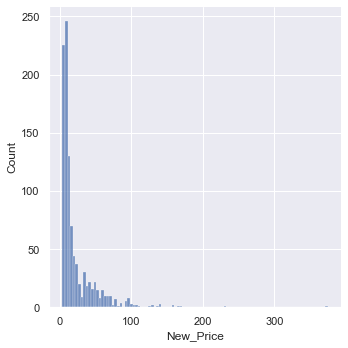

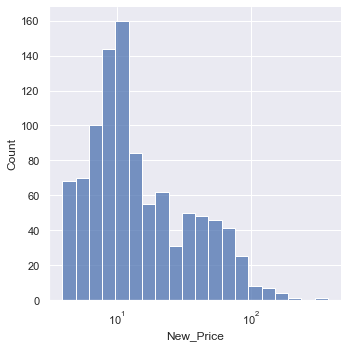

In [297]:
print(sns.displot(df['New_Price'], log_scale=False))
print(sns.displot(df['New_Price'], log_scale=True))

Usually, continous variables should be kept continous, however, we cannot afford to drop 80% per cent of our set. Instead,
we can bin into several price categories and add an extra category called 'Unavailable'. However, for our model to be more
precise, we should drop the Lamborghini observation since it's price is probably multiuple times larger than the 
other brands. Logically, this wouldn't help much if we don't impute mean price per Brand since we would get an 'unavailable'
category with thousands of counts. For this reason, we first impute price by mean Brand price and then bin the results.

In [298]:
df.drop(df.loc[df['Brand'] == 'Lamborghini'].index, inplace=True)
df['New_Price'] = df['New_Price'].fillna(df.groupby('Brand')['New_Price'].transform('mean'))

print(df.groupby('Brand')['New_Price'].mean().sort_values())   

Brand
Datsun             4.848182
Renault            7.676061
Maruti             7.845907
Tata               8.775769
Fiat               9.002500
Mahindra          10.957429
Nissan            11.612632
Honda             11.669759
Hyundai           11.836154
Volkswagen        11.910000
Ford              14.074138
Jeep              22.746316
Toyota            23.627021
Skoda             26.213571
Mitsubishi        33.314615
Isuzu             33.680000
Mini              40.894211
Volvo             43.080000
Jaguar            58.455714
BMW               62.473333
Audi              65.141724
Mercedes-Benz     73.642449
Land Rover       119.322000
Porsche          136.000000
Bentley          375.000000
Ambassador              NaN
Chevrolet               NaN
Force                   NaN
Hindustan               NaN
Lamborghini             NaN
OpelCorsa               NaN
Smart                   NaN
Name: New_Price, dtype: float64


In [299]:
df['Price_Category'] = pd.cut(
    df['New_Price'], [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, np.inf], 
    labels = ["Under 10 Lakh", "10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "60 to 70", "70 to 80", "Above 80"])

In [300]:
df['Price_Category'] = df['Price_Category'].astype(str).replace('nan', 'Unavailable').astype('category')
df.drop('New_Price', axis = 1, inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Price_Category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Under 10 Lakh
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10 to 20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Under 10 Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Under 10 Lakh
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,60 to 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen,10 to 20
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,Volkswagen,10 to 20
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,Nissan,10 to 20
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,Volkswagen,10 to 20


In [301]:
# The final step in our imputation process, is to deal with the column 'Price'. Since this is our response varibale, it 
# would be unwise to fill mising values with group mean as it could impact the way our model learns its weights. After
# careful consideration, we decide the best course of action is to drop these columns which represent 16 or so per cent of
# out total observations

df = df[df['Price'].notna()]

In [302]:
# Still plenty of observations to train our model after pre-processing was done!
df.shape

(5973, 14)

# Univariate, Bivariate and Outlier Detection

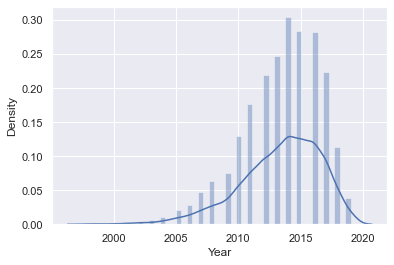

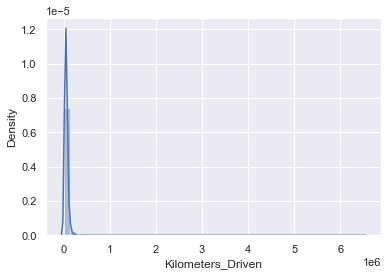

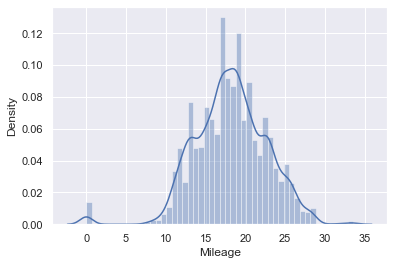

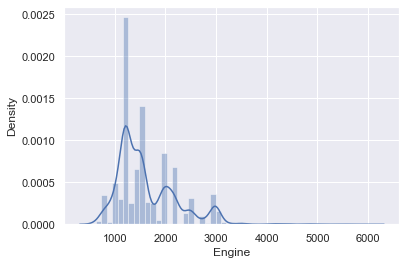

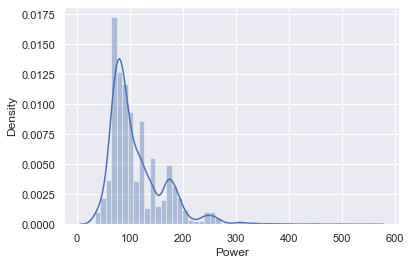

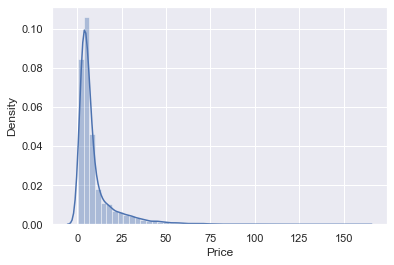

<Figure size 432x288 with 0 Axes>

In [303]:
# Let's plot some distribution plots and box plots to help us detect any possible outlier

for i in df.select_dtypes([np.number]).columns:
    sns.distplot(df[i]);
    plt.figure()

Some of our univariate variables are highly skewed, such as Year, Price and Kilometers_Driven. We will have to check for outliers and treat them as required and use log transformation to make the distribution less skewed.

In [304]:
for i in ['Engine', 'Power', 'Kilometers_Driven', 'Price']:
    df[i] = np.log(df[i])

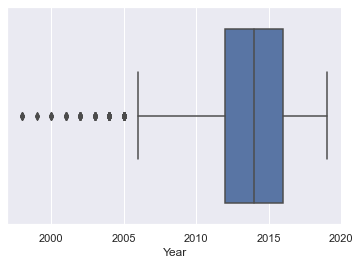

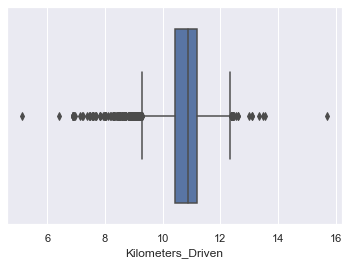

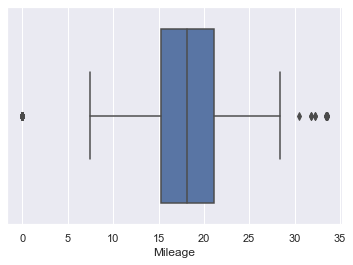

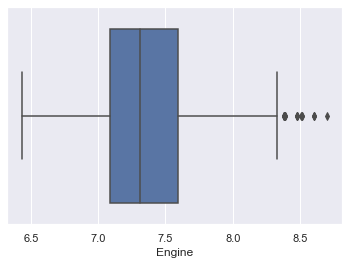

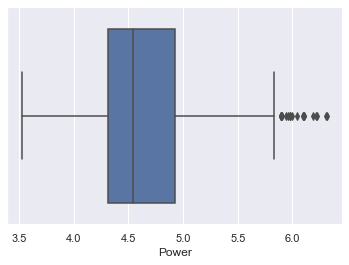

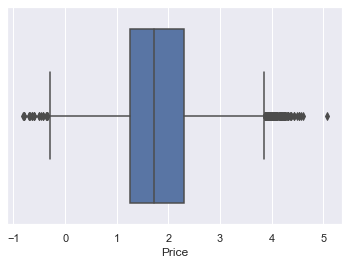

<Figure size 432x288 with 0 Axes>

In [305]:
for i in df.select_dtypes([np.number]).columns:
    sns.boxplot(df[i]);
    plt.figure()

After the log transformation, we still notice several outliers, however, as we explain later on, basing our decisions on market knowledge, we don't truly see extreme values here except 1 in kilometers driven and 1 in price, let's investigate further. If required, we have also written a line of code which we have commented out, that will remove values where z-score > 3. (See "Get dummies and apply standarization" below).

In [306]:
# From the histigrams and boxplots above, we can detect a couple possible outliers. Let's investigate further

df[df['Price'] == df['Price'].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Price_Category
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,10.126631,Diesel,Automatic,First,13.33,8.004032,5.541264,5.0,5.075174,Land Rover,Above 80


In [307]:
df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Price_Category
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,15.687313,Diesel,Automatic,First,15.97,8.004032,5.55296,5.0,4.174387,BMW,60 to 70


In [308]:
df.drop(df.loc[df['Name'] == 'BMW X5 xDrive 30d M Sport'].index, inplace=True)

In [309]:
df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Price_Category
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,13.560618,Diesel,Automatic,First,19.3,7.584773,4.94876,5.0,2.014903,Skoda,20 to 30


A price of 160 Lakh for a second-hand Range Rover (Top model) does not seem to be a mistake. However, the BMW X5 has
driven 6.5 million kilometers(after doing exponent transformation) in just a few years, which seems rather impossible. The engine would break down before it gets there. Furthermore, it sold for a price of 65 Lakh which again tells us this is probably a mistake. Let's get rid of
said observation.

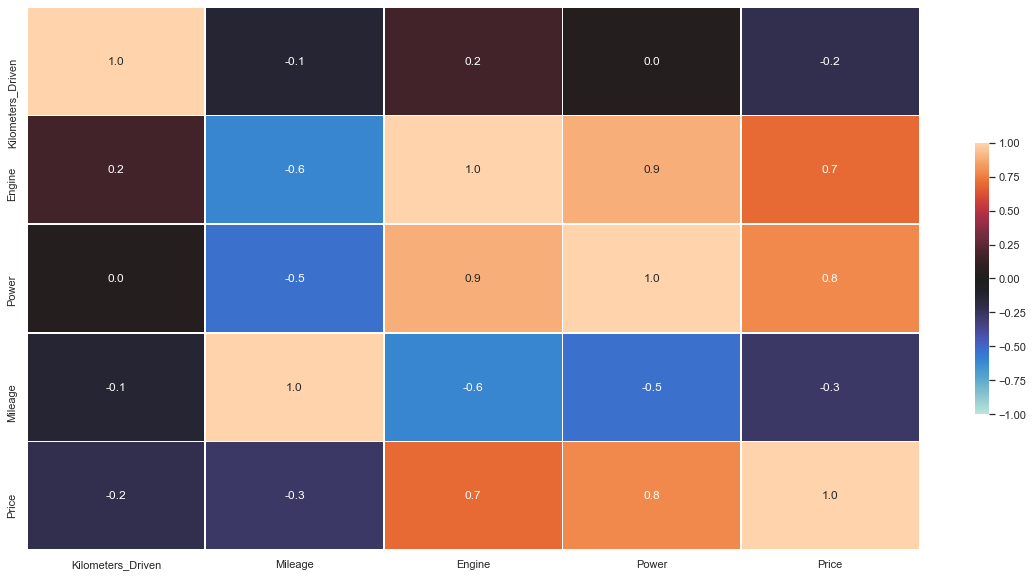

In [310]:
# Let's look at a correlations heatmap and see if we can drop any columns which are highly correlated
numeric_columns = df.select_dtypes(include=np.number).columns.tolist() # Select only numeric columns and drop Year
numeric_columns.remove('Year')
corr = df[numeric_columns].corr().sort_values(by=['Kilometers_Driven'],ascending=False)

f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr, annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0, square=False, linewidths=.7, cbar_kws={"shrink": .5});

We notice a high correlation betweeen Price and Power, but we shouldn't drop either since Price is the varibale we are trying to predict. Similarly, there is a mild-strong correlation between Engine size and Price but we won't drop either because of the reasons above. We also notice a negative correlation between engine size and Mileage, which makes sense.

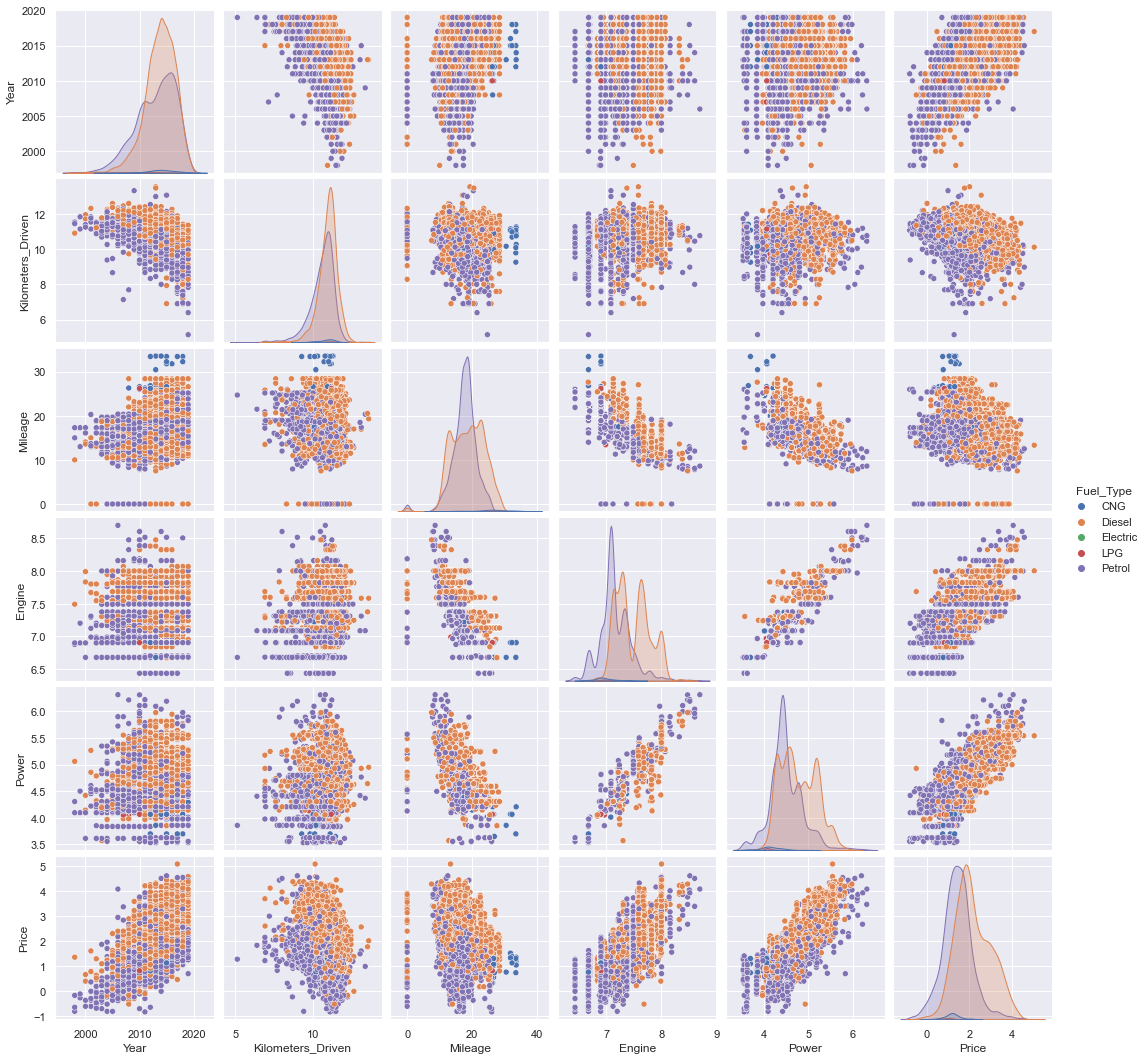

In [311]:
# Let's take a look at a pairplot to visulaize correlations better and differentiate by Fuel_Type
sns.pairplot(df, hue="Fuel_Type");

We can see that Diesel has three 'common' types of Engine size, while petrol follows a normaldistibution. Diesel cars also tend to have a higher Mileage than Petrol cars, which is a known fact amongst car enthusiasts. As mentioned before, Power and Engine size have a positive correlation, while Engine Size (and Power) have a negative correlation with Mileage. There seems to be a correlation between Year and Price, as well as Year and Kilometers Driven, which makes logical sense since older cars have been driven for longer.

# Get dummies and apply standarization
We are now ready to get dummies from our clean dataset and standarize numerical columns

In [312]:
# We use pandas get_dummies function to accomplish this. We drop first column of each dummy category to avoid 
# multicollinearity. We will also drop the column "Name" since it contains too many categories.
df_dummies = pd.get_dummies(df.drop('Name', axis = 1), drop_first=True)
df_dummies.head() # We have 73 columns now, which might sound like a lot but in Regression problems it's not uncommon to use
# hundreds of columns. 

# Here we use a custom function to standarize numerical columns so our regression model performs better.
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

for i in ['Mileage', 'Kilometers_Driven']:
    df_dummies[i] = z_transform(df_dummies[i])

# Note! While in this particular case I decided to keep most observations and not getting rid of 'outliers' since I consider
# them to be 'normal' observations in this car study, we could have easily selected only those observations within 3 
# standard deviations from the mean by applying the following code:

#for i in ['Mileage', 'Kilometers_Driven']:
    #df_dummies = df_dummies[(np.abs(df_dummies[i]) < 3)]
#df_dummies

# You can take the hashtags out and run the code from results are very similar in both cases!

# Model Implementation

In [313]:
lr = LinearRegression() # Initialize model
# Get feature set, response set and divide into training and testing seta
X = df_dummies.drop('Price', axis = 1)
y = df_dummies[['Price']]

# We use train_test_split for to get our sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [314]:
# Train model
lr.fit(X_train, y_train)

LinearRegression()

In [315]:
# Let's look at the coefficients for each of our features
coef = pd.DataFrame(np.append(lr.coef_.flatten(), lr.intercept_),
             index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
coef.sort_values(by = 'Coefficients', ascending=False)

,Coefficients
Power,6.797831e-01
Brand_Bentley,6.482071e-01
Seats_10.0,5.842833e-01
Price_Category_Above 80,5.144506e-01
Brand_Mini,5.079154e-01
Price_Category_Unavailable,4.611485e-01
Price_Category_60 to 70,4.464226e-01
Engine,3.795973e-01
Price_Category_50 to 60,3.793489e-01
Price_Category_70 to 80,3.274942e-01


Clearly we can see Year has a strong impact on the price of the car. And 'luxury' Brands also tend to add value to the vehicle. We can note that if the is being sold in Jaipur, this adds a premium on the price. Electric engines deduct a great deal of price from the car in question.

# Performance

In [316]:
# Let's check our model's performance using our test set and compare different metrics
def metrics(x,y):
    print('MAE =', mean_absolute_error(y, lr.predict(x)))
    print('RMSE =', np.sqrt(mean_squared_error(y, lr.predict(x))))
    print('R-squared =', lr.score(x, y))
    print('Adjusted R-squared =',(1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)))

In [317]:
# Train Set metrics
metrics(X_train, y_train)

MAE = 0.1589177276085166
RMSE = 0.20960965042674887
R-squared = 0.9407951302781424
Adjusted R-squared = 0.9397716226691208


In [318]:
# Test Set metrics
metrics(X_test, y_test)

MAE = 0.16906296118984518
RMSE = 0.23578884564925062
R-squared = 0.9297924460465312
Adjusted R-squared = 0.9268926576051721


The training and testing RMSE are .20 and .24 respectively, and both scores are comparable.The model generalizes well!
R-squared score is 0.94, that explains 94.1 % of total variation in the train dataset (and 93% in testing set). So, overall the model is satisfactory.


# Assumption checks

In [413]:
# Check for multicollinearity within our features
X_mc = X.copy()
X_mc['Constant'] = 1
X_mc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Price_Category_20 to 30,Price_Category_30 to 40,Price_Category_40 to 50,Price_Category_50 to 60,Price_Category_60 to 70,Price_Category_70 to 80,Price_Category_Above 80,Price_Category_Unavailable,Price_Category_Under 10 Lakh,Constant
0,2010,0.599638,1.863940,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2015,-0.189275,0.328833,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,-0.028059,0.003204,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,0.864772,0.572501,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2013,-0.200597,-0.661345,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [414]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [415]:
vif = pd.Series([variance_inflation_factor(X_mc.values,i) for i in range(X_mc.shape[1])],index=X_mc.columns)
print(format(vif))

Year                              2.286022
Kilometers_Driven                 1.811567
Mileage                           3.335084
Engine                           12.200639
Power                             9.745991
Location_Bangalore                2.475666
Location_Chennai                  2.992602
Location_Coimbatore               3.550772
Location_Delhi                    3.175963
Location_Hyderabad                3.847306
Location_Jaipur                   2.694435
Location_Kochi                    3.598312
Location_Kolkata                  3.147794
Location_Mumbai                   4.027238
Location_Pune                     3.422659
Fuel_Type_Diesel                 28.895031
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.197563
Fuel_Type_Petrol                 29.587846
Transmission_Manual               2.313656
Owner_Type_Fourth & Above         1.017769
Owner_Type_Second                 1.174738
Owner_Type_Third                  1.126544
Seats_2.0  

In [416]:
vif[vif > 10].index # We will drop these columns
X_mc.drop(vif[vif > 10].index, axis=1, inplace=True)
X_mc

,Year,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_LPG,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_9.0,Seats_10.0,Brand_Force,Brand_Hindustan,Brand_Lamborghini,Brand_OpelCorsa,Brand_Smart,Price_Category_30 to 40,Price_Category_Under 10 Lakh,Constant
0,2010,0.599638,1.863940,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2015,-0.189275,0.328833,4.837868,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,-0.028059,0.003204,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,0.864772,0.572501,4.485936,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2013,-0.200597,-0.661345,4.947340,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,-0.755722,2.262669,4.304065,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6015,2015,1.059883,1.376604,4.262680,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6016,2012,0.222294,-0.927164,4.718499,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
6017,2013,-0.028059,0.158265,4.206184,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


Some of our columns show very high degrees of multicollinearity. Some of them are quiet logical, for example, Seat_5 since most of our example cars have 5 seats and some have 7 seats. So knowing one or the other greatly affects the probability of belonging to the other category. Let's drop 'Seats_5.0', 'Price_Category_60 to 70', 'Constant', 'Fuel_Type_Petrol', 'Brand_Chevrolet' and check our new model performance.

In [444]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y, test_size=0.30, random_state=5)

lr_mc = LinearRegression().fit(X_train_mc, y_train_mc)
lr_mc.predict(X_train_mc)

array([[1.05876544],
       [2.11171343],
       [2.35453599],
       ...,
       [2.17911864],
       [1.70976111],
       [1.38697871]])

After dropping a few columns, we are able to get below threshold of 10 points in most varibales. We can notice many of the Brand
dummies have inf values, and this is due to the fact that for many brands there are few examples, and knowing other cars' brands affects the probability that the example belongs to another brand.

In [445]:
pred = lr_mc.predict(X_test_mc)
pred = np.sqrt((pred)**2) # Some of our predicted prices are negative, which is certainly not plausible so we cancel the
# negative sign by squaring and taking the root of our values
residual = pred - y_test_mc.values
np.mean(residual)


0.0030775696283028057

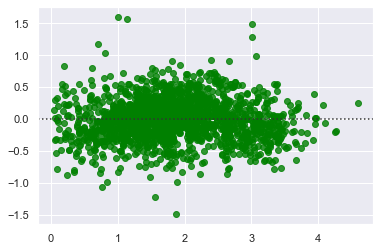

In [446]:
sns.residplot(pred,residual,color="green",lowess=False);

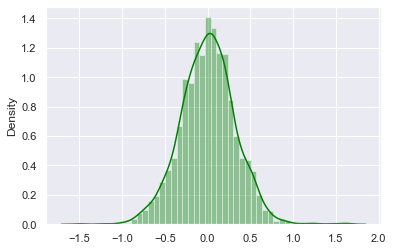

In [447]:
sns.distplot(residual, color='green'); # Notice the very long tail to the right, one of our predictions was very far from
# actual value unfortunatley!

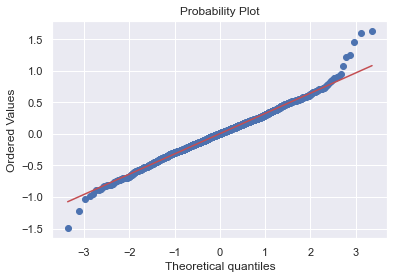

In [448]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

In [449]:
print('MAE =', mean_absolute_error(y_test_mc, lr_mc.predict(X_test_mc)))
print('RMSE =', np.sqrt(mean_squared_error(y_test_mc, lr_mc.predict(X_test_mc))))
print('R-squared =', lr_mc.score(X_test_mc, y_test_mc))
print('Adjusted R-squared =',(1 - (1-lr_mc.score(X_test_mc, y_test_mc))*(len(y_test_mc)-1)/(len(y)-X_test_mc.shape[1]-1)))

MAE = 0.24783857425367745
RMSE = 0.3172138980744503
R-squared = 0.8720532604290884
Adjusted R-squared = 0.9614371672281644


After getting rid of highly correlated columns which we were able to pinpoint with help of the variance_inflation_factor function, we increased r-squared from 92.7 to 96, quite the improvement! This is why it's important to check for multicollinearity when using regression models. However, notice MAE increased by quite a few percentage points, there was probably some useful information in the columns we dropped. Of course, as one keeps adding columns, we can explain achieve lower errors but at the cost of higher multicollineaity within our features.

Our model is not capturing all available information from the features available but it does a good enough job when considering randomness of residual plot and probability plot. We note mean residuals close to zero, low multicollonearity (since we removed correlated columns), close to normality of residuals and linearity of residuals. After careful consideration, I assume outliers are a big problem in this predicting price of a car. While we could get rid of outliers in numerical columns by trimming the top and low 10 per cent of observations, I consider this to be too great of a manipulation. The approach shown in LifeExpectancy where 'ouliers' are capped, makes our results very textbook defined. We get a mean residual of almost 0 and the residual plot shows almost perfect randomness, however, such perfect case are rare in real life. Our mean residual is close to zero and we have achieved acceptable results under the metrics defined in the previous part. Instead, we took the more academic approach where only extreme outliers were eliminated from out dataset.
The second reason I suspect outliers (I would rather call them extreme values since they are not product of mistakes, rather just how the data is), are a big problem, is the fact that our predictions tend to be off the mostly at the tails, while the middle predictions follow what ressembles a normal distribution.

# Recommendations
- From the insights gained through our categorical barplots, it's clear Mumbai would be a good place to open a used car business since it is the most active, this is perhaps due to the large population of the city. Of course, one could argue this means greater competition, but with the help of our price predictor, we could gain an advantage over other used car companies.
- Secondly, it would be wise to use our prediction models on cars which use either Petrol or Diesel engnes since we have too few examples of the other type of vehicles. It would perhaps be wise to look for more Electric car examples since they are becoming increasingly popular around the world. Logically, price has a large effect on the price of used cars, so if we were to grow our business, we could set an 'age' threshold to accept cars of up to a certain age.
- Likewise, it would also be better to focus in the sale of cars which have been driven less than 100k kilometers since our model learned it's weights from examples with similarly used cars.
- Using this model for extremely expensive cars would not be wise since the predicted price would probably be too far for the real price, we could train a model for better accuracy in those cases if we had more examples and not less than 5 in a 7000 row dataset.
- As one would expect, Power has a very important positive coefficient which translats to higher power = higher price. Unsurprisngly, the dummy variable for Bentley is also quite important, and said brand usually commands extremely expensive prices in the real car market.
- We have also learned that 'Engine' and 'Power' have a very large correlation coefficient, so no need to use both in our dataset as we could save up that memory for other useful features (see below).
- As explained above, our model does not perfectly predict the price of all cars and at times, the residuals are very large. We could research other features such as 'score' which we could scrap from websites online and add to our dataset.
- Important! To obtain an actual price prediction, we must use the exponential of our predicted value since we used a log transformation!!

In [455]:
# Example of how to get actual price. Not bad!!
print('Predicted value = ', np.exp(p[20]))
print('Actual value = ', np.exp(y_test_mc.iloc[20,0]))

Predicted value =  2.01193446509674
Actual value =  2.11
